In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [2]:
# load data

X = pd.read_csv("occupancy.csv", parse_dates=["date"])

print(X.shape)

X.head()

(8100, 7)


,id,date,temperature,humidity,light,co2,humidity_ratio
0,1,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745
1,1,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741
2,1,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739
3,1,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751
4,1,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734


In [3]:
# load target

y = pd.read_csv("occupancy_target.csv", index_col="id")
y = pd.Series(y["occupancy"])

print(y.shape)

y.head()

(135,)


id
1    0
2    0
3    0
4    0
5    0
Name: occupancy, dtype: int64

In [4]:
# function to plot subtime series

def plot_timeseries(n_id):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    X[X["id"] == n_id]["temperature"].plot(ax=axes[0, 0], title="temperature")
    X[X["id"] == n_id]["humidity"].plot(ax=axes[0, 1], title="humidity")
    X[X["id"] == n_id]["light"].plot(ax=axes[0, 2], title="light")
    X[X["id"] == n_id]["co2"].plot(ax=axes[1, 0], title="co2")
    X[X["id"] == n_id]["humidity_ratio"].plot(ax=axes[1, 1], title="humidity_ratio")

    plt.show()

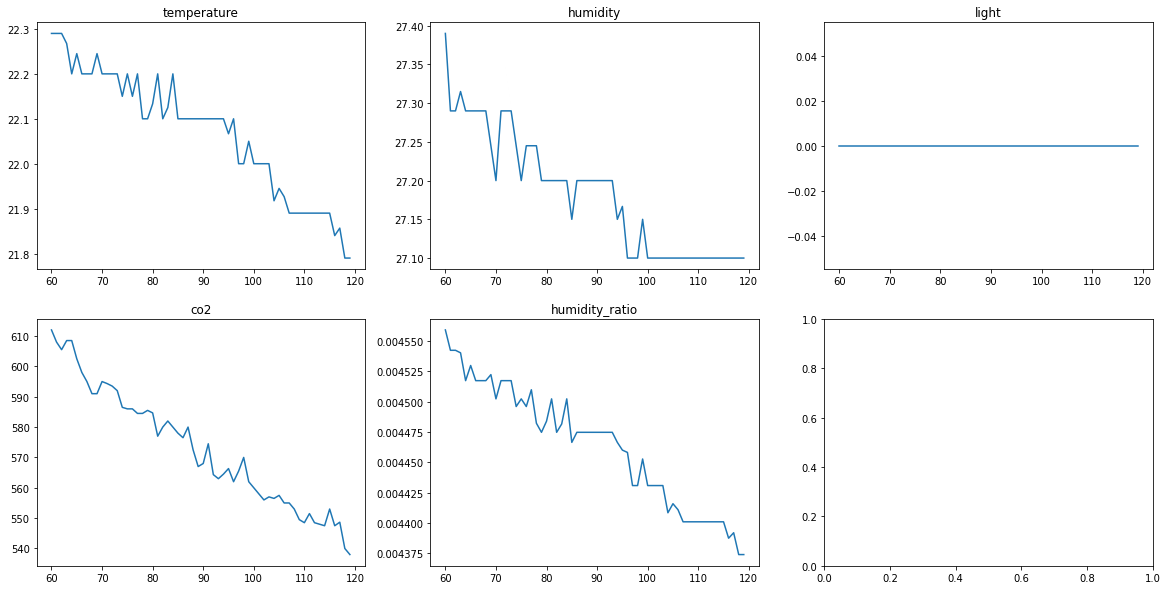

In [5]:
# Plot a time series where occupancy is 0

plot_timeseries(2)

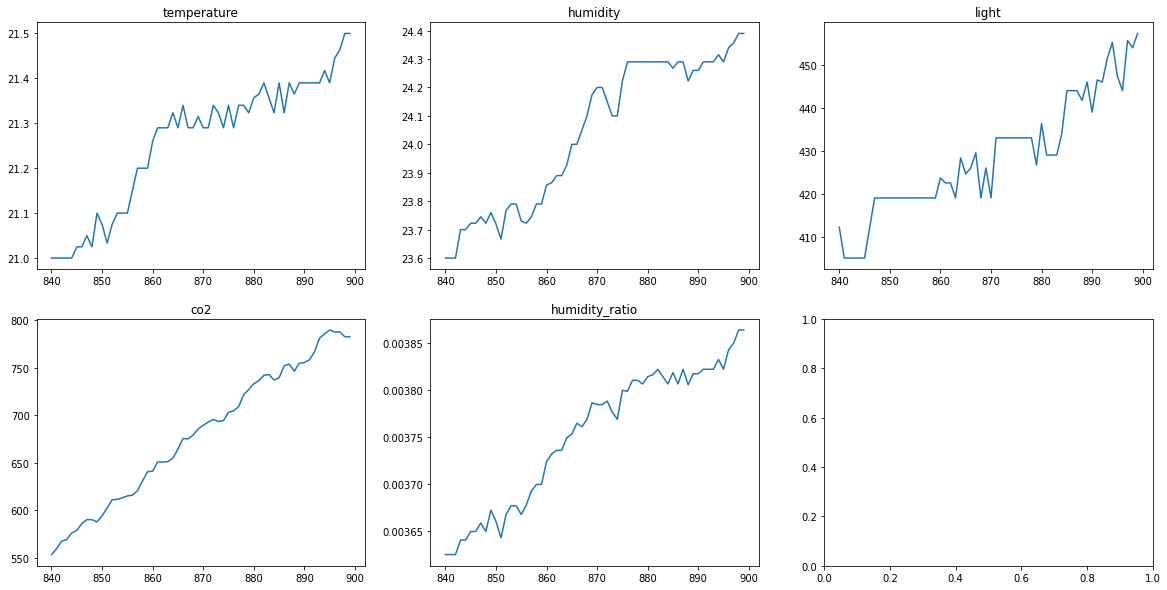

In [6]:
# Plot a time series where occupancy is 1

plot_timeseries(15)

In [7]:
# create features for one time series: light

features = extract_features(X[["id", "light"]], column_id="id")

features.shape

Feature Extraction: 100%|█████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.21it/s]


(135, 789)

In [8]:
features.head()

,light__variance_larger_than_standard_deviation,light__has_duplicate_max,light__has_duplicate_min,light__has_duplicate,light__sum_values,light__abs_energy,light__mean_abs_change,light__mean_change,light__mean_second_derivative_central,light__median,...,light__permutation_entropy__dimension_6__tau_1,light__permutation_entropy__dimension_7__tau_1,light__query_similarity_count__query_None__threshold_0.0,"light__matrix_profile__feature_""min""__threshold_0.98","light__matrix_profile__feature_""max""__threshold_0.98","light__matrix_profile__feature_""mean""__threshold_0.98","light__matrix_profile__feature_""median""__threshold_0.98","light__matrix_profile__feature_""25""__threshold_0.98","light__matrix_profile__feature_""75""__threshold_0.98",light__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,2932.5,1228508.25,7.101695,-7.101695,0.0,0.0,...,0.540075,0.63793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.928571
2,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,-0.000000,-0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,-0.000000,-0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,-0.000000,-0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,-0.000000,-0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [9]:
[f for f in features.columns]

['light__variance_larger_than_standard_deviation',
 'light__has_duplicate_max',
 'light__has_duplicate_min',
 'light__has_duplicate',
 'light__sum_values',
 'light__abs_energy',
 'light__mean_abs_change',
 'light__mean_change',
 'light__mean_second_derivative_central',
 'light__median',
 'light__mean',
 'light__length',
 'light__standard_deviation',
 'light__variation_coefficient',
 'light__variance',
 'light__skewness',
 'light__kurtosis',
 'light__root_mean_square',
 'light__absolute_sum_of_changes',
 'light__longest_strike_below_mean',
 'light__longest_strike_above_mean',
 'light__count_above_mean',
 'light__count_below_mean',
 'light__last_location_of_maximum',
 'light__first_location_of_maximum',
 'light__last_location_of_minimum',
 'light__first_location_of_minimum',
 'light__percentage_of_reoccurring_values_to_all_values',
 'light__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'light__sum_of_reoccurring_values',
 'light__sum_of_reoccurring_data_points',
 'light__rati

In [10]:
len([f for f in features.columns if features[f].isnull().mean() > 0.5])

338

In [11]:
# select 5 features to display in book recipe

feats = features.columns[10:15]

feats

Index(['light__mean', 'light__length', 'light__standard_deviation',
       'light__variation_coefficient', 'light__variance'],
      dtype='object')

In [12]:
# display some features (for book)

features[feats].head()

,light__mean,light__length,light__standard_deviation,light__variation_coefficient,light__variance
1,48.875,60.0,134.485582,2.751623,18086.371875
2,0.000,60.0,0.000000,NaN,0.000000
3,0.000,60.0,0.000000,NaN,0.000000
4,0.000,60.0,0.000000,NaN,0.000000
5,0.000,60.0,0.000000,NaN,0.000000


In [13]:
impute(features)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['light__fft_coefficient__attr_"real"__coeff_31'
 'light__fft_coefficient__attr_"real"__coeff_32'
 'light__fft_coefficient__attr_"real"__coeff_33'
 'light__fft_coefficient__attr_"real"__coeff_34'
 'light__fft_coefficient__attr_"real"__coeff_35'
 'light__fft_coefficient__attr_"real"__coeff_36'
 'light__fft_coefficient__attr_"real"__coeff_37'
 'light__fft_coefficient__attr_"real"__coeff_38'
 'light__fft_coefficient__attr_"real"__coeff_39'
 'light__fft_coefficient__attr_"real"__coeff_40'
 'light__fft_coefficient__attr_"real"__coeff_41'
 'light__fft_coefficient__attr_"real"__coeff_42'
 'light__fft_coefficient__attr_"real"__coeff_43'
 'light__fft_coefficient__attr_"real"__coeff_44'
 'light__fft_coefficient__attr_"real"__coeff_45'
 'light__fft_coefficient__attr_"real"__coeff_46'
 'light__fft_coefficient__attr_"real"__coeff_47'
 'light__fft_coefficient__at

,light__variance_larger_than_standard_deviation,light__has_duplicate_max,light__has_duplicate_min,light__has_duplicate,light__sum_values,light__abs_energy,light__mean_abs_change,light__mean_change,light__mean_second_derivative_central,light__median,...,light__permutation_entropy__dimension_6__tau_1,light__permutation_entropy__dimension_7__tau_1,light__query_similarity_count__query_None__threshold_0.0,"light__matrix_profile__feature_""min""__threshold_0.98","light__matrix_profile__feature_""max""__threshold_0.98","light__matrix_profile__feature_""mean""__threshold_0.98","light__matrix_profile__feature_""median""__threshold_0.98","light__matrix_profile__feature_""25""__threshold_0.98","light__matrix_profile__feature_""75""__threshold_0.98",light__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,2932.500000,1.228508e+06,7.101695,-7.101695,0.000000,0.0,...,0.540075,0.637930,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,418.928571
2,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
3,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
4,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
5,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
132,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
133,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000
134,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.0,1.072107,4.946542,2.718038,2.713749,1.897205,3.581291,0.000000


In [14]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.1,
    random_state=42,
)

In [15]:
# train and evaluate logistic regression

cls = LogisticRegression(random_state=10, C=0.01)
cls.fit(X_train, y_train)

print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      1.00      0.86         3

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14



In [16]:
# create features from all time series

features = extract_features(
    X,
    column_id="id",
    impute_function=impute,
    column_sort="date",
)

features.shape

Feature Extraction: 100%|█████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.08s/it]


(135, 3945)

In [17]:
# split into train and test

X_train, X_test, y_train, y_t5est = train_test_split(
    features,
    y,
    test_size=0.1,
    random_state=42,
)

In [18]:
# train and evaluate logistic regression

cls = LogisticRegression(random_state=10, C=0.000000000000001)
cls.fit(X_train, y_train)

print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      1.00      0.86         3

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14

